# Fourier series

Remember - Shift+Enter executes the code block, clicking on the code block will edit it, and double clicking on a text block will edit it.

In [1]:
%pylab inline
plt.xkcd() # I love this XKCD style!

Populating the interactive namespace from numpy and matplotlib


## 1. The absolute value function

Let

$ f(x) = |x|, \quad -2 < x < 2 $.

Its Fourier series is

$ \displaystyle F(x) = 1 - \frac{8}{\pi^2} \left(\cos\left(\frac{\pi x}{2}\right) + \frac{1}{9} \cos\left(\frac{3 \pi x}{2}\right) + \frac{1}{25} \cos\left(\frac{5 \pi x}{2}\right) + \cdots \right)$

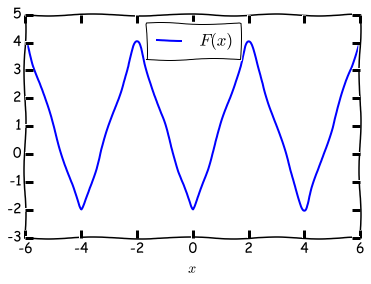

In [18]:
def f(x):
    return abs(x)

a0 = 2
p = 2

def a(n):
    if (n%2==1):
        return -8/np.pi*1/n**2
    else:
        return 0


def b(n):
    return 0

def F(x, n):
    partial_sum = a0/2
    for n in range (1, n+1):
        partial_sum += a(n)*np.cos(n*x*np.pi/p) + b(n)*np.sin(n*x*np.pi/p)
    return partial_sum


x = np.arange(-6, 6, 0.01)
ax = pylab.axes()
#ax.plot(x, f(x), color="red", label="$f(x) = |x|$")
ax.plot(x, F(x, 10), color="blue", label="$F(x)$")
ax.set_xlabel('$x$')
ax.legend(loc="upper center")
plt.show()

## The step function

Let

$ f(x) = \begin{cases} 0 & -1 < x < 0 \\ 
                        5 & x = 0 \\
                        1 & 0 < x < 1 \end{cases} $

Its Fourier series is

$ \displaystyle F(x) = \frac{1}{2} + \frac{2}{\pi} \left( \sin (x) + \frac{1}{3}\sin(3x) +\frac{1}{5} \sin(5x) + \cdots \right) $

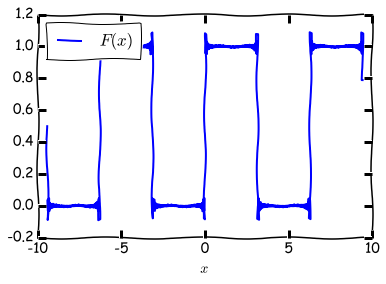

In [16]:
def f(x):
    new_array = []
    for n in range(0, len(x)):
        if x[n] < 0:
            new_array.append(0)
        else:
            new_array.append(1)
    return new_array

a0 = 1

def a(n):
    return 0

def b(n):
    if (n%2==1):
        return 2/np.pi*1/n
    else:
        return 0

def F(x, n):
    partial_sum = a0/2
    for n in range (1, n+1):
        partial_sum += a(n)*np.cos(n*x) + b(n)*np.sin(n*x)
    return partial_sum

x = np.arange(-3*np.pi, 3*np.pi, 0.01)
xleft = np.arange(-np.pi, -0.001, 0.01)
xright = np.arange(0.001, np.pi, 0.01)
ax = pylab.axes()
ax.plot(x, F(x,100), color="blue", label="$F(x)$")
ax.set_xlabel('$x$')
ax.legend(loc="upper left")
plt.show()

## The partial quadratic

Let

$ f(x) = \begin{cases} 0 & -\pi < x <= 0 \\
                        x^2 & 0 < x < \pi\end{cases}$
                        
Then the Fourier series of $f(x)$ is

$\displaystyle F(x) = \frac{\pi^2}{6} + \sum_{n=1}^\infty \left[ \frac{(-1)^n 2}{n^2} \cos(nx) + \left(\frac{\pi}{n} (-1)^{n+1} + \frac{2}{\pi n^3}\left( (-1)^n - 1\right) \right) \sin(nx) \right]$

Let's plot the Fourier series with $n=20$ terms.

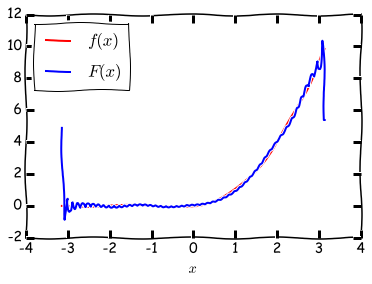

In [30]:
def f(x):
    new_array = []
    for n in range(0, len(x)):
        if x[n] < 0:
            new_array.append(0)
        else:
            new_array.append(x[n]**2)
    return new_array

def b(n):
    if (n%2==1):
        return np.pi/n - 4/(n**3*np.pi)
    else:
        return -np.pi/n

def a(n):
    return (-1)**n*2/n**2

a0 = np.pi**2/6

def F(x, n):
    partial_sum = a0
    for n in range (1, n+1):
        partial_sum += a(n)*np.cos(n*x) + b(n)*np.sin(n*x)
    return partial_sum

x = np.arange(-np.pi, np.pi, 0.01)
ax = pylab.axes()
ax.plot(x, f(x), color="red", label="$f(x)$")
ax.plot(x, F(x,50), color="blue", label="$F(x)$")
ax.set_xlabel('$x$')
ax.legend(loc="upper left")
plt.show()

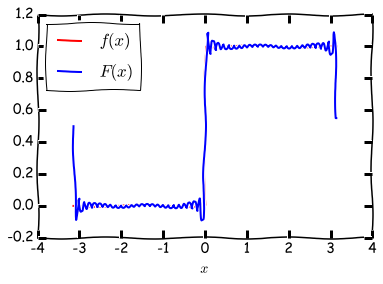

In [31]:
def f(x):
    new_array = []
    for n in range(0, len(x)):
        if x[n] < 0:
            new_array.append(0)
        else:
            new_array.append(1)
    return new_array

def b(n):
    return ((-1)**(n+1) + 1)/(n*np.pi)
    
def a(n):
    return 0

a0 = 1/2

def F(x, n):
    partial_sum = a0
    for n in range (1, n+1):
        partial_sum += a(n)*np.cos(n*x) + b(n)*np.sin(n*x)
    return partial_sum

x = np.arange(-np.pi, np.pi, 0.01)
ax = pylab.axes()
ax.plot(x, f(x), color="red", label="$f(x)$")
ax.plot(x, F(x,50), color="blue", label="$F(x)$")
ax.set_xlabel('$x$')
ax.legend(loc="upper left")
plt.show()

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from IPython.html.widgets import interactive
from IPython.display import Audio, display
import numpy as np

def beat_freq(f1=220.0, f2=224.0):
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
    print(f1, f2, abs(f1-f2))
    display(Audio(data=signal, rate=rate))
    return signal

v = interactive(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0))
display(v)
v.kwargs
f1, f2 = v.children
f1.value = 255
f2.value = 260
plt.plot(v.result[0:6000])

274.8 260.0 14.800000000000011


array([ 0.        ,  0.41696013,  0.81555426, ...,  0.47518774,
        0.54461432,  0.58778525])

In [ ]:
## BLOCK 1
import sympy as sp

## symbols we need to describe p,q-torus knots
## t time parameter. p,q indexes the torus knot
## r minor radius, R major radius
spt, spp, spq, spr, spR = sp.symbols("t p q r R", real=True)

c = sp.Matrix([(spR+spr*sp.cos(2*sp.pi*spq*spt))*sp.cos(2*sp.pi*spp*spt), 
     (spR+spr*sp.cos(2*sp.pi*spq*spt))*sp.sin(2*sp.pi*spp*spt), 
      spr*sp.sin(2*sp.pi*spq*spt)])
dc = sp.Matrix([sp.diff(x,spt) for x in c]) # derivative
ldc = sp.sqrt(sum( [ x**2 for x in dc ] )).simplify() # speed
udc = dc/ldc

## 2nd order
kc = sp.Matrix([sp.diff(x,spt) for x in udc]) # curvature vector
ks = sp.sqrt(sum( [ x**2 for x in kc])) # curvature scalar
ukc = kc/ks # unit curvature vector

## bi-normal
bnc = udc.cross(ukc) # cross of unit tangent and unit curvature.

## the parametrization of the boundary of the width w tubular neighbourhood

spw, spu = sp.symbols("w, u", real=True) ## width of torus knot, and meridional parameter
tSurf = c + spw*sp.cos(2*sp.pi*spu)*ukc + spw*sp.sin(2*sp.pi*spu)*bnc

## BLOCK 2

## Let's have a visualization routine that takes as input a curve and a framing of the curve.  
##  We will then plot things like a tubular neighbourhood of the curve, together with some
##  decoration on the boundary. 

import numpy as np
import itertools as it

## (a) lambdify with numpy.  This returns a 3-element list.
knotSnp = sp.lambdify((spt, spp, spq, spr, spR, spw, spu), tSurf, "numpy" )

## (b) ufuncify
from sympy.utilities.autowrap import ufuncify
knotSuf = [ufuncify([spt, spp, spq, spr, spR, spw, spu], tSurf[i]) for i in range(3)]

## (c) theano
from sympy.printing.theanocode import theano_function
knotSth = theano_function([spt,spp,spq,spr,spR,spw,spu], [tSurf],
                          dims={spt:0, spp:0, spq:0, spr:0, spR:0, spw:0, spu:0})

kp = 5 ## these are the "p" and
kq = 3 ## "q" of our (p,q) torus knot.
tR = 1.6 # major torus radius
tr = 0.6 # minor torus radius. 
kt = (np.pi*tr) / (4*kp) # knot radial thickness 2*pi*tr is circumf, and kp strands pass through so this
## should be around 2*pi*tr  would be 2*kp*kt for the knot to fill the surface, i.e kt = pi*tr / 4*kp
## make bigger or smaller depending on how much empty space one wants to see.

seg = kp*300 ## segments along length of pq torus knot. kp*120 gives a fairly smooth image.
segm = 40 ## meridional segmentation of pq torus knot. 60 is fairly smooth. 

def surf1(i,j): ## sympy raw
    return np.array(tSurf.evalf(subs={spt:float(i)/seg, spu:float(j)/segm, 
                                       spp:kp, spq:kq, spr:tr, spR:tR, spw:kt}) )
def surf2(i,j): ## lambdify
    return np.array(knotSnp(float(i)/seg, kp, kq, tr, tR, kt, float(j)/segm)).ravel()
def surf3(i,j): ## ufuncify
    return np.array([knotSuf[k](float(i)/seg, kp, kq, tr, tR, kt, float(j)/segm) for k in range(3)])
def surf4(i,j): ## theano
    return knotSth(float(i)/seg, kp, kq, tr, tR, kt, float(j)/segm).ravel()

Surf = [surf1, surf2, surf3, surf4]
SurfLabel = ["sympy.evalf", "sympy.lambdify", "ufuncify", "theano"]

## BLOCK 3

k = 2 # determines which method we use to cast sympy expressions to a callable function.

import time as ti
start=ti.time()
surf = Surf[k]
pqMesh = np.array(list( it.chain.from_iterable(([surf(i,j), surf(i+1,j), surf(i,j+1)], 
                                                [surf(i+1,j), surf(i+1,j+1), surf(i,j+1)]) for i,j in it.product(range(seg), range(segm)))))
end=ti.time()
print(SurfLabel[k]+" mesh generation: "+str(end-start)+" seconds.", flush=True)

colA = np.array([0.0, 0.0, 1.0, 1.0])
colB = np.array([1.0, 1.0, 0.0, 1.0])

#print(SurfLabel[useFunc] + str(" mesh ")+str(pqMesh))

def iCol(i,j): ## interpolates between colA and colB
    alph = np.pi*float(j)/segm
    bet = np.pi*float(i)/seg
    gam = 1.0*alph - kp*kq*bet ## coprime combination of alpha and beta
    return (np.sin(gam)**2)*colA + (np.cos(gam)**2)*colB
    
## coloration of mesh
pqColors = np.array(list(it.chain.from_iterable(([iCol(i,j),iCol(i+1,j),iCol(i,j+1)], 
                                              [iCol(i+1,j),iCol(i+1,j+1),iCol(i,j+1)]) for i,j in it.product(range(seg), range(segm)) )))

## BLOCK 4

## Let's now generate the vispy data
from vispy import geometry, app, scene
import vispy, sys
from vispy.scene import cameras

canvas = scene.SceneCanvas(keys='interactive', size=(800, 600), show=True)
view = canvas.central_widget.add_view()
view.parent = canvas.scene
view.camera = scene.TurntableCamera(parent=view.scene, fov=45)  
view.bgcolor = '#606060'
## shading options are empty (pass nothing), shading='smooth' and shading='flat'
pqtorus = scene.visuals.Mesh(pqMesh,face_colors=pqColors, shading='smooth')

axis = scene.visuals.XYZAxis(parent=view.scene)

## and showtime! 
view.add(pqtorus)
canvas.app.run()